In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
with open('../outputs/uncleaned_wiki_scrape.json', 'r', encoding='utf-8') as f:
    wiki_data = json.load(f)

In [3]:
attribute_set = set()
attribute_count = {}

cols_to_remove = ["dissolved, abolished or demolished date", "different from"]

clean_data = {}

for player, attributes in wiki_data.items():
    clean_data[player] = {}
    for attribute in attributes:
        if attribute in cols_to_remove:
            continue
        if attribute == 'headquarters location':
            attribute_set.add('Work Venue')
            clean_data[player]['Work Venue'] = wiki_data[player]['headquarters location']
        else:
            attribute_set.add(attribute.title())
            clean_data[player][attribute.title()] = wiki_data[player][attribute]
        
    attribute_count[player] = len(attributes)

In [4]:
print("Attribute Stats")
print(f"Mean Attribute Count: {np.mean(list(attribute_count.values()))}")
print(f"Median Attribute Count: {np.median(list(attribute_count.values()))}")
print(f"Standard Deviation in Attribute Count: {np.std(list(attribute_count.values()))}")
print(f"Max Attribute Count: {np.max(list(attribute_count.values()))}")
print(f"Min Attribute Count: {np.min(list(attribute_count.values()))}")

Attribute Stats
Mean Attribute Count: 14.007364222154035
Median Attribute Count: 14.0
Standard Deviation in Attribute Count: 3.9970003810647117
Max Attribute Count: 24
Min Attribute Count: 0


In [5]:
nan_count = defaultdict(lambda: 0)

for player in clean_data:
    for attribute in attribute_set:
        if attribute not in clean_data[player]:
            clean_data[player][attribute] = None
            nan_count[attribute]+=1

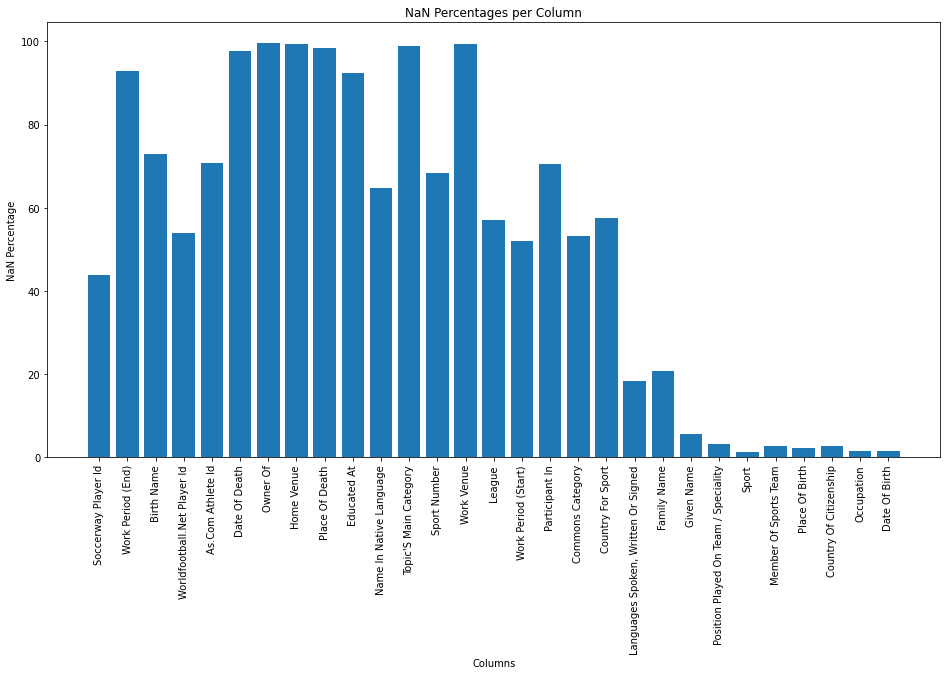

In [6]:
fig, ax = plt.subplots(1,1 )
fig.set_size_inches(16, 8)
ax.bar(range(len(nan_count)), [x*100/len(wiki_data) for x in nan_count.values()])
ax.set_xticks(range(len(nan_count)))
ax.set_xticklabels(nan_count.keys(), rotation='vertical', fontsize=10)
ax.set_title("NaN Percentages per Column")
ax.set_xlabel("Columns")
ax.set_ylabel("NaN Percentage")
plt.show()

In [7]:
with open('../outputs/cleaned_wiki_scrape.json', 'w') as f:
    json.dump(clean_data, f, indent=2)